In [2]:
import networkx as nx
import numpy as np
import random as rd
from scipy.sparse import csc_matrix
from IPython.display import Image
import itertools as it
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

# Random graphs with the use of Python's random module

In [3]:
# random.random
# Often in an algorithm, we need something to happen with some probability  p . The canonical way to decide whether or not such an event happens is to generate a random number  r  between 0 and 1, and if  r<p , then the event occurs. The random.random() function returns just such a random number in the interval [0, 1).

rd.random()

0.5762032343611904

In [4]:
# random.choice
# When we have a population of discrete choices and we need to select one at random, we use random.choice(). For example, instead of "eeny, meeny, miny, moe," we can use random.choice to choose a random name:

names = ['Alice', 'Bob', 'Cathy', 'Dan']
rd.choice(names)

'Alice'

In [5]:
# random.sample
# If we have a collection and we need to select more than one element without replacement, we use random.sample(). For example, to choose two nodes at random from the nodes in a graph, we can use the following:

rd.sample(names, 2)

['Bob', 'Dan']

In [6]:
# random.choices
# choice options at random with given weights
# We use random.choices() when we need to choose an element from a collection when the chances of selecting each element are not identical. For an example, let's assume Alice, Bob, and Carol are in a raffle drawing. Alice bought one ticket, Bob bought three tickets, and Carol bought four tickets. We can simulate ten different draws of this raffle, replacing the drawn ticket each time, with the following code:

names = ['Alice', 'Bob', 'Carol']
tickets = [1, 3, 4]

for _ in range(10):
    print(rd.choices(names, tickets))

['Bob']
['Carol']
['Bob']
['Carol']
['Carol']
['Bob']
['Carol']
['Carol']
['Bob']
['Bob']


In [7]:
# By specifying the keyword argument k=, we can choose k items from the collection with replacement:
# The weights provided to random.choices do not have to be integers -- any numeric weights are fine.
rd.choices(names, tickets, k=10)

['Carol',
 'Carol',
 'Carol',
 'Carol',
 'Carol',
 'Bob',
 'Bob',
 'Carol',
 'Bob',
 'Alice']

# Random Network Model

The random network model, as formulated by Gilbert, has two parameters: the number of nodes  N , and the link probability  p . As in the book text, the algorithm for creating this network is as follows:
<ol>
    <li>Select a pair of nodes, say i and j.</li>
    <li>Generate a random number r between 0 and 1. If r < p, then add a link between i and j.</li>
    <li>Repeat (1) and (2) for all pairs of nodes.</li>
</ol>

We'll need a couple of tools from Python for this task:

## Generating combinations
We've previously looped over all nodes in a graph, as well as all graph edges, but this algorithm requires us to loop over all pairs of nodes, i.e. all possible edges. The itertools module in Python's standard library gives us the combinations() function, an elegant way to loop over pairs of elements in a sequence:

In [8]:
import itertools

elements = [0, 1, 2, 3, 4]
list(itertools.combinations(elements, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

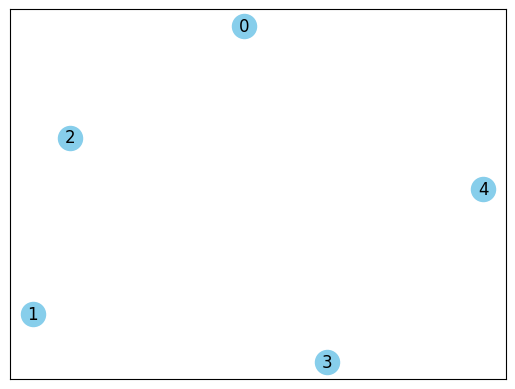

In [9]:
G = nx.Graph()
G.add_nodes_from(elements)
nx.draw_networkx(G, with_labels=True, node_color='skyblue')

## Erdös-Rényi random graph model
Instead of specifying the link probability  p , we can also generate a graph of  N  nodes with exactly  M  edges by using random.sample() to choose M of the possible edges generated with itertools.combinations():

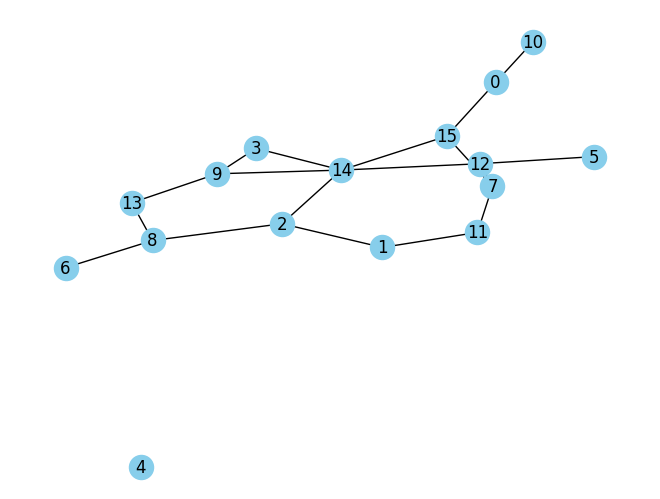

In [10]:
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))

    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = rd.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)

    return G

G = gnm_random_graph(16, 18)
nx.draw(G, with_labels=True, node_color='skyblue')

## Gilbert random graph model
With these tools in our toolbelt, we can code the algorithm for the Gilbert random graph model.

58 edges.


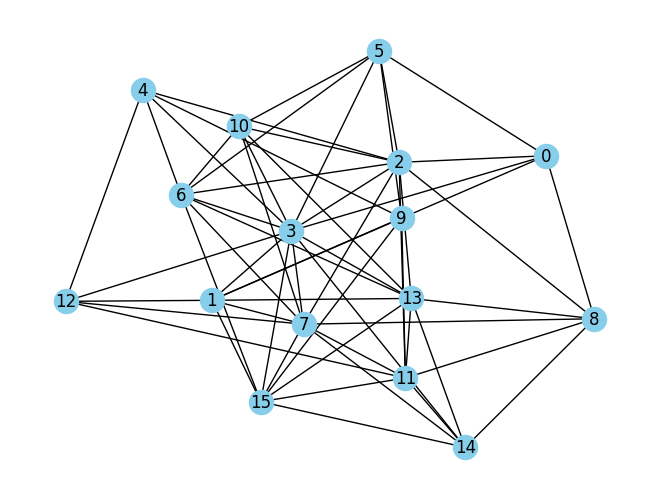

In [11]:
def gnp_random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))

    for i, j in itertools.combinations(G.nodes, 2):
        r = rd.random()
        if r < p:
            G.add_edge(i, j)
        # Do nothing if r >= p

    return G

G = gnp_random_graph(16, 0.5)
nx.draw(G, with_labels=True, node_color='skyblue')
print(G.number_of_edges(), 'edges.')

## NetworkX functions
NetworkX has a function for the  Gn,p  random graph specifying number of nodes  N  and link probability  p : gnp_random_graph().

In addition, NetworkX provides gnm_random_graph(), which generates a  Gn,m  graph, where we specify the number of nodes  N  and the desired number of edges  M .

### generate a network directly from a given matrix
you can define a numpy matrix and convert it into a Graph object

[[0 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 0 1]
 [1 1 0 1 0 1 0 0]
 [1 1 1 0 0 0 1 0]
 [1 1 0 0 0 1 1 0]
 [1 1 1 0 1 0 0 0]
 [1 0 0 1 1 0 0 1]
 [1 1 0 0 0 0 1 0]]


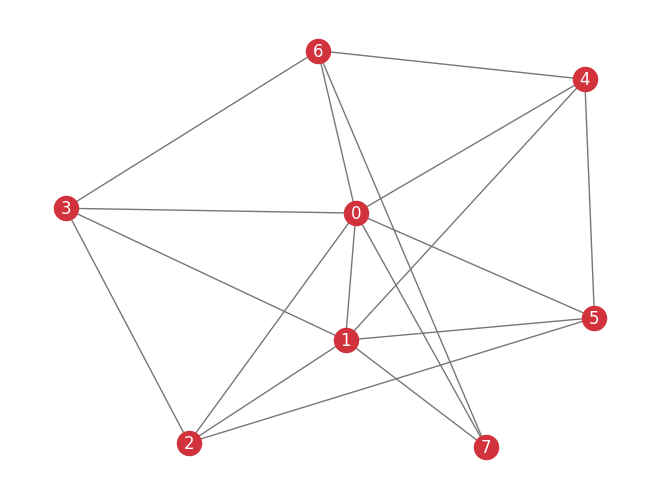

In [12]:
N = 8
A = np.random.randint(2,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops
print(A_symmetric)

G = nx.from_numpy_array(A_symmetric)

nx.draw(G,
        with_labels=True,
        node_color='#d2323c',
        edge_color='#777777',
        node_size=300,
        font_color='white',
        font_size=12,
        )


[[0 1 0 0 1 1 1 1]
 [0 0 0 1 1 1 1 1]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


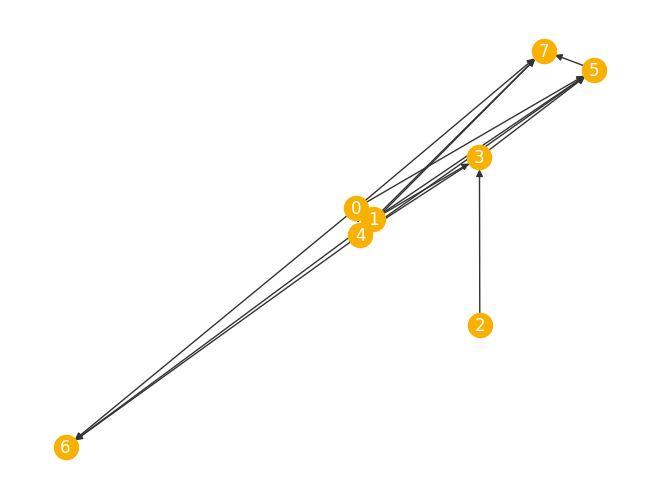

In [13]:
# for DIRECTED networks it works like this:
N = 8
A = np.random.randint(2,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A[np.tril_indices(A.shape[0], -1)] = 0  # set the lower left triangle to 0
np.fill_diagonal(A, 0) # write zeros on the diagonal to avoid selfloops

print(A)

# make explicit that you want the network to be directed
G = nx.from_numpy_array(A,create_using=nx.DiGraph)

nx.draw(G,
        with_labels=True,
        node_color='#f8b100',
        edge_color='#333333',
        node_size=300,
        font_color='white',
        font_size=12,
        )

[[0.         0.72888196 0.79659808 0.46914756 0.21520531 0.01451547]
 [0.72888196 0.         0.1869774  0.24923826 0.2933346  0.81299612]
 [0.79659808 0.1869774  0.         0.1292006  0.84015497 0.4201046 ]
 [0.46914756 0.24923826 0.1292006  0.         0.53889459 0.49648093]
 [0.21520531 0.2933346  0.84015497 0.53889459 0.         0.41761035]
 [0.01451547 0.81299612 0.4201046  0.49648093 0.41761035 0.        ]]


{0: Text(-0.38538537497135417, -0.7206495184080199, '0'),
 1: Text(-0.9578818437641954, 0.0377116605602434, '1'),
 2: Text(0.5828316024128908, -0.7755063255261776, '2'),
 3: Text(0.04280037978094719, 1.0, '3'),
 4: Text(0.8511648950198143, 0.16566799177881894, '4'),
 5: Text(-0.13352965847810191, 0.2927761915951359, '5')}

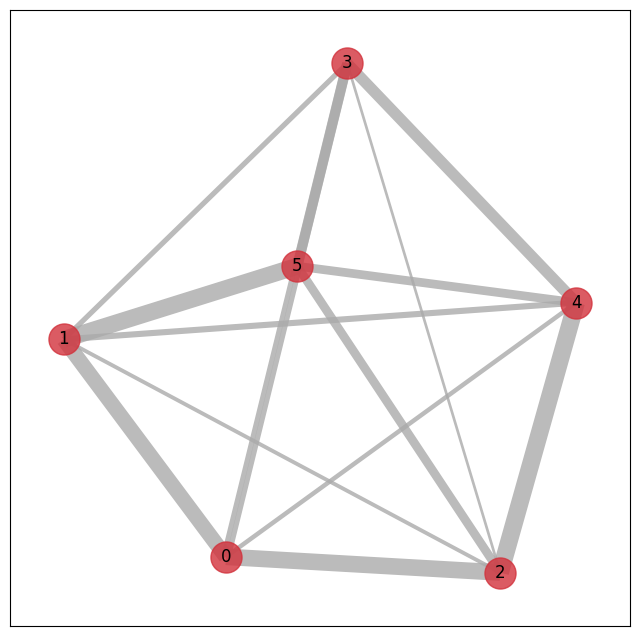

In [14]:
# and for WEIGHTED networks:
N = 6
A = np.random.uniform(0,1,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops

print(A_symmetric)


G = nx.from_numpy_array(A_symmetric)


l_w = []
for a,b in G.edges():
    l_w.append(G[a][b]['weight'])


plt.figure(figsize=(8,8))

pos = nx.spring_layout(G)

edgewidth = [15*d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos=pos, width=edgewidth,edge_color='#aaaaaa',alpha=.8)

nx.draw_networkx_nodes(G, pos=pos, node_size=500,node_color='#d2323c',alpha=.8)

nx.draw_networkx_labels(G, pos=pos)

[0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 2. 1. 0. 1. 1. 1. 1. 0.
 1. 2. 2. 2. 2. 0. 1. 0. 0. 1. 0. 2. 1. 2. 0. 1. 3. 2. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 3. 0. 0. 1. 0. 1. 3. 1. 1. 1. 0. 2. 1. 3. 0. 1.
 0. 2. 2. 2. 0. 3. 2. 1. 0. 0. 1. 2. 0. 1. 2. 1. 1. 0. 0. 3. 0. 0. 0. 1.
 1. 1. 0. 0.]
average degree : 0.911
# of connected components : 57
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
diameter :  7.0
average shortest path length : [0, 0, 3.333, 0, 1.333, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 2.778, 1.667, 0, 1.0, 1.0, 0, 2.0, 0, 0, 0, 0, 1.333, 1.333, 0, 1.0, 1.8, 0, 0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


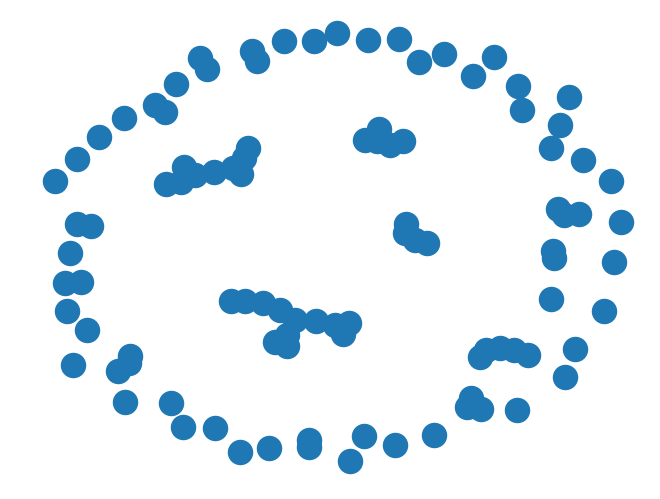

In [15]:
n = 100 # 500 takes too long..!
p = 0.01
G = gnp_random_graph(n, p)
nx.draw(G)

#average degree ⟨k⟩
k = np.zeros(n)
nodlist = list(G.nodes())
for i in range(1, G.number_of_nodes()):
  j = i-1
  k[j] = len(list(G.neighbors(nodlist[j])))
print(k)
avgk = np.average(k, weights=nodlist)
avgk = round(avgk,3)
print('average degree :', avgk)

#the number of connected components
connected = nx.number_connected_components(G)
print('# of connected components :', connected)

#diameter
dist = np.zeros((n, n))
for m in range(G.number_of_nodes()):
  for n in range(G.number_of_nodes()):
    if list(nx.all_simple_paths(G, m, n)) == []:
      dist[m-1][n-1] = 0
    else:
      dist[m-1][n-1] = nx.shortest_path_length(G, m, n)
print(dist)
print('diameter : ', np.max(dist) )

#the average shortest path length
avgsp = []
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    avgsp.append(nx.average_shortest_path_length(C))
for i in range(len(avgsp)):
  avgsp[i-1] = round(avgsp[i-1], 3)
print('average shortest path length :', avgsp)

[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 3, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 1, 3, 1, 1, 1, 0, 2, 1, 3, 0, 1, 0, 2, 2, 2, 0, 3, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 2]
{0, 1, 2, 3}
{0: 42, 1: 36, 2: 16, 3: 6}


Text(0, 0.5, 'frequency')

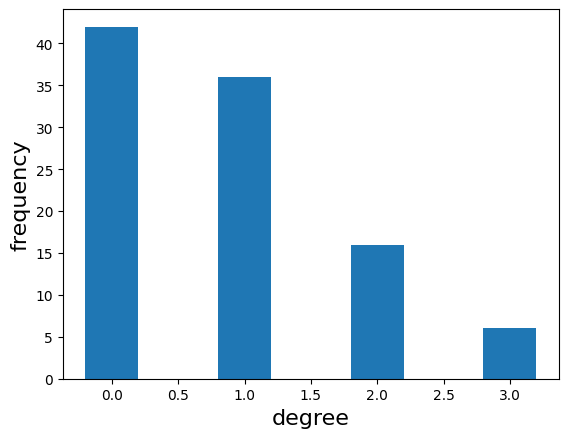

In [16]:
#plot the degree distribution
# counting the number of neighbors:
l_k = list(dict(G.degree()).values())
print(l_k)
# the set operation makes entries unique
s_k = set(l_k)
print(s_k)
# # counting the number of neighbors and store it into a dict
dict_k_frequency = {}
for k in s_k:
  dict_k_frequency[k] = l_k.count(k)
print(dict_k_frequency)
plt.bar(dict_k_frequency.keys(), dict_k_frequency.values(),width=.4)
plt.xlabel('degree',fontsize = 16)
plt.ylabel('frequency',fontsize = 16)

Text(0, 0.5, 'Average k')

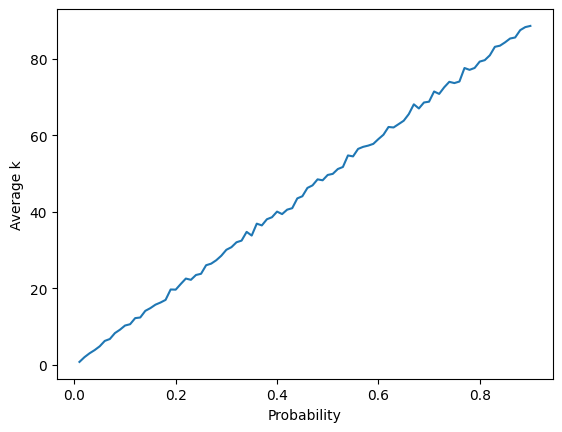

In [17]:
n = 100
p = 0.01

probv = []
avgkv = []
nodlist = list(G.nodes())

while p <= 0.9 :
 Gv = gnp_random_graph(n,p)
 k = np.zeros(n)

 for i in range(Gv.number_of_nodes()):
  j = i-1
  k[j] = len(list(Gv.neighbors(nodlist[i])))
 avgk = np.average(k, weights=nodlist)
 avgk = round(avgk,3)
 avgkv.append(avgk)
 probv.append(p)
 p = round(p + 0.01, 3)

#print(probv)
#print(avgkv)

plt.plot(probv, avgkv)
plt.xlabel("Probability")
plt.ylabel("Average k")
# average of k is linearly proportional to probaility; the more edges, the larger the average degree

Text(0, 0.5, 'size of lcc')

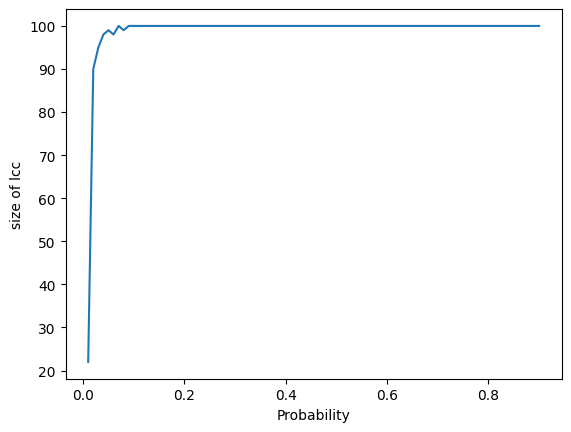

In [18]:
#(iii) Iterate over a range of connection probabilities and measure the size of the largest connected component  Slcc  now.
#(You can do both measurements for ii and iii in one loop)
#Plot  Slcc  over  p  and make sure that you can see the differnt regimes of connectedness.
n = 100
p = 0.01

probv = []
lccv = []
nodlist = list(G.nodes())

while p <= 0.9 :
 Gv = gnp_random_graph(n,p)
 cc = list(nx.connected_components(Gv))
 ccl = []
 for i in range(len(cc)):
  ccl.append(len(cc[i-1]))

 lccv.append(max(ccl))
 probv.append(p)
 p = round(p + 0.01, 3)

plt.plot(probv, lccv)
plt.xlabel("Probability")
plt.ylabel("size of lcc")
#shows a saturation behavior; despite a low probability of connenction between nodes, the nodes have a high chance to get fully connected

In [ ]:
#combined
#Plot  Slcc  also over the average the average degree and discuss briefly what you observe
n = 100
p = 0.01

probv = []
avgkv = []
lccv = []
nodlist = list(G.nodes())

while p <= 0.9 :
 Gv = gnp_random_graph(n,p)
 k = np.zeros(n)

 for i in range(Gv.number_of_nodes()):
  j = i-1
  k[j] = len(list(Gv.neighbors(nodlist[i])))
 avgk = np.average(k, weights=nodlist)
 avgk = round(avgk,3)
 avgkv.append(avgk)

 cc = list(nx.connected_components(Gv))
 ccl = []
 for i in range(len(cc)):
  ccl.append(len(cc[i-1]))

 lccv.append(max(ccl))
 probv.append(p)
 p = round(p + 0.01, 3)

plt.plot(avgkv, lccv)
plt.xlabel("Average k")
plt.ylabel("size of lcc")
#shows a saturation behavior; as the average degree <k> is linealy proportional to probability, the graph of the size of lcc against <k> shows the same tendency. In other words, there is a high chance for nodes to be fully connedted even though each node dose not show a high dgree(or there are not so many edges between nodes)